# Airbnb project 

- Katrine Bay s183910, Gustav Larsen s18xxxx, Rasmus Aagaard s164419 and Mathilde Block sxxxxxx.

- Section 1:Introduction + Data analysis and visualization

- Section 2:Prediction Challenge
- Section 3:Exploratory Component
- Section 4:Conclusions

## Introduction

In this project we will be working with data from Airbnb. The data is from the city of Copenhagen, Denmark, and contains information about the listings, the hosts and the reviews. The data is from xxx and can be found on the website [InsideAirbnb](http://insideairbnb.com/get-the-data/).

## Data analysis and visualization

In [7]:
# loading packages etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)


In [8]:
# read in data
listings_ = pd.read_csv('data/listings.csv')
listings = pd.read_csv('data/listings_CPH.csv')
reviews = pd.read_csv('data/reviews.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')

# gz zipped files
calendar_gz = pd.read_csv('data/calendar.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_gz = pd.read_csv('data/listings.csv.gz',compression='gzip',
                   error_bad_lines=False)                   
reviews_gz = pd.read_csv('data/reviews.csv.gz',compression='gzip',
                   error_bad_lines=False)  

# convert to pandas dataframe
# listings = pd.DataFrame(listings)
reviews = pd.DataFrame(reviews)
neighbourhoods = pd.DataFrame(neighbourhoods)

calendar_gz = pd.DataFrame(calendar_gz)
listings_gz = pd.DataFrame(listings_gz)
reviews_gz = pd.DataFrame(reviews_gz)

In [11]:
# joining dataframes 
df_reviews = pd.merge(reviews, reviews_gz, on = ['listing_id','date'])
df_listings = pd.merge(listings_, listings_gz, on = ['host_id','id'])

In [12]:
df_listings.columns


Index(['id', 'name_x', 'host_id', 'host_name_x', 'neighbourhood_group',
       'neighbourhood_x', 'latitude_x', 'longitude_x', 'room_type_x',
       'price_x', 'minimum_nights_x', 'number_of_reviews_x', 'last_review_x',
       'reviews_per_month_x', 'calculated_host_listings_count_x',
       'availability_365_x', 'number_of_reviews_ltm_x', 'license_x',
       'listing_url', 'scrape_id', 'last_scraped', 'source', 'name_y',
       'description', 'neighborhood_overview', 'picture_url', 'host_url',
       'host_name_y', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_y',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude_y',
       'longitude_y', '

In [ ]:
# Data preprocessing

# Notice that the variables require some treatment in order to be usable 
# (e.g. Categorical, strings, different scales, etc).

<AxesSubplot:xlabel='room_type', ylabel='price'>

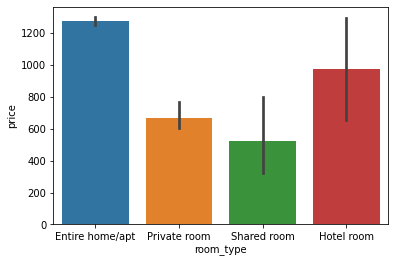

In [13]:
sns.barplot(x='room_type', y='price', data=listings)

<AxesSubplot:xlabel='room_type', ylabel='price'>

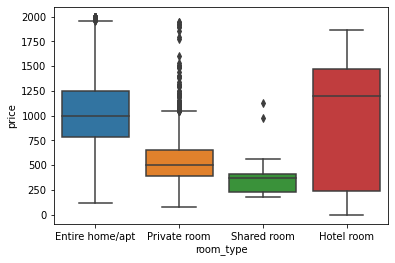

In [14]:
# excluding the outliers 
sns.boxplot(x='room_type', y='price', data=listings[listings['price'] < 2000])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

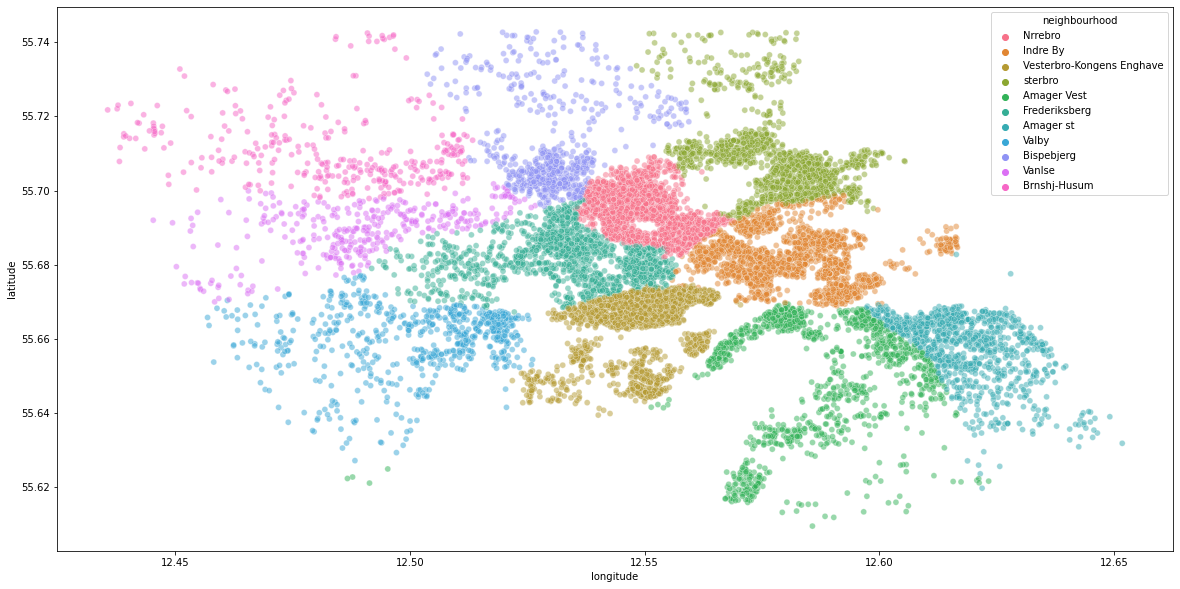

In [15]:
# mapping out Copenhagen
# size figure
plt.figure(figsize=(20, 10))
sns.scatterplot(x='longitude', y='latitude', data=listings, hue='neighbourhood', alpha=0.5)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

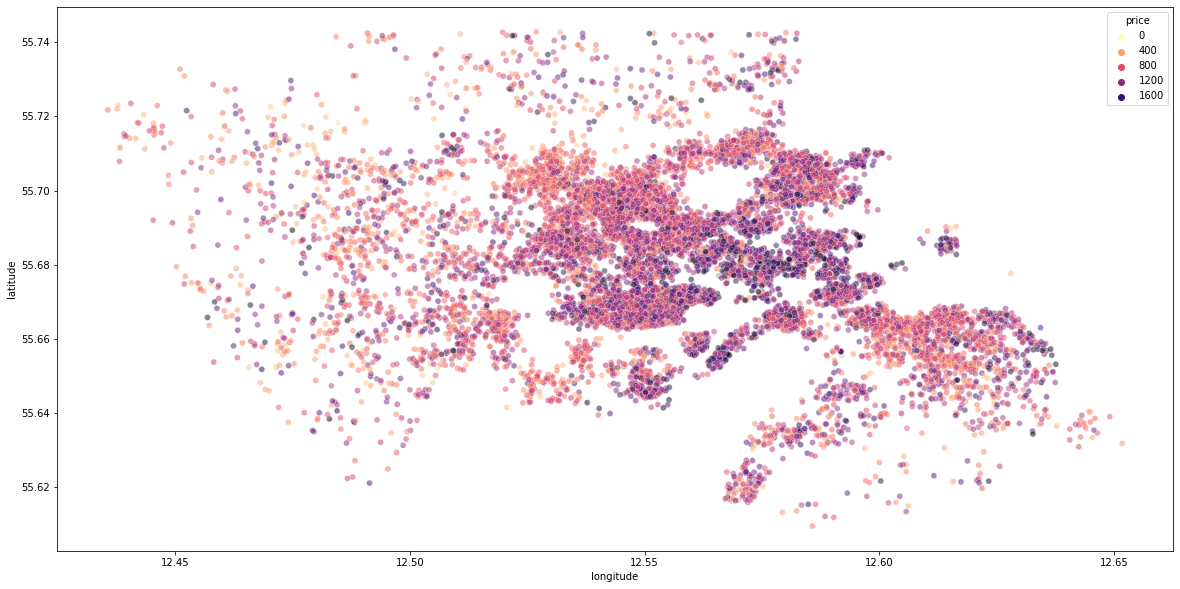

In [25]:
# mapping prices on top of the map
# size figure
plt.figure(figsize=(20, 10))
sns.color_palette("magma", as_cmap=True)
sns.scatterplot(x='longitude', y='latitude', data=listings[listings['price'] < 2000], hue='price', alpha=0.5, palette='magma_r')

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

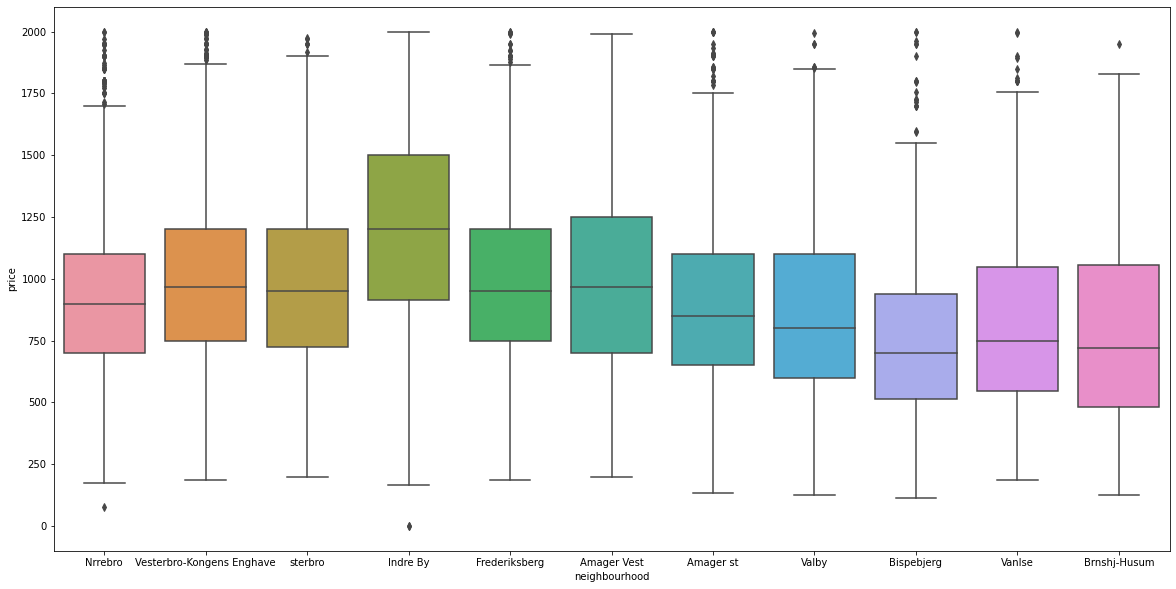

In [17]:
# correlation between price and neighborhood 
# size figure
plt.figure(figsize=(20, 10))
sns.boxplot(x='neighbourhood', y='price', data=listings[listings['price'] < 2000])

<AxesSubplot:xlabel='neighbourhood_x', ylabel='review_scores_rating'>

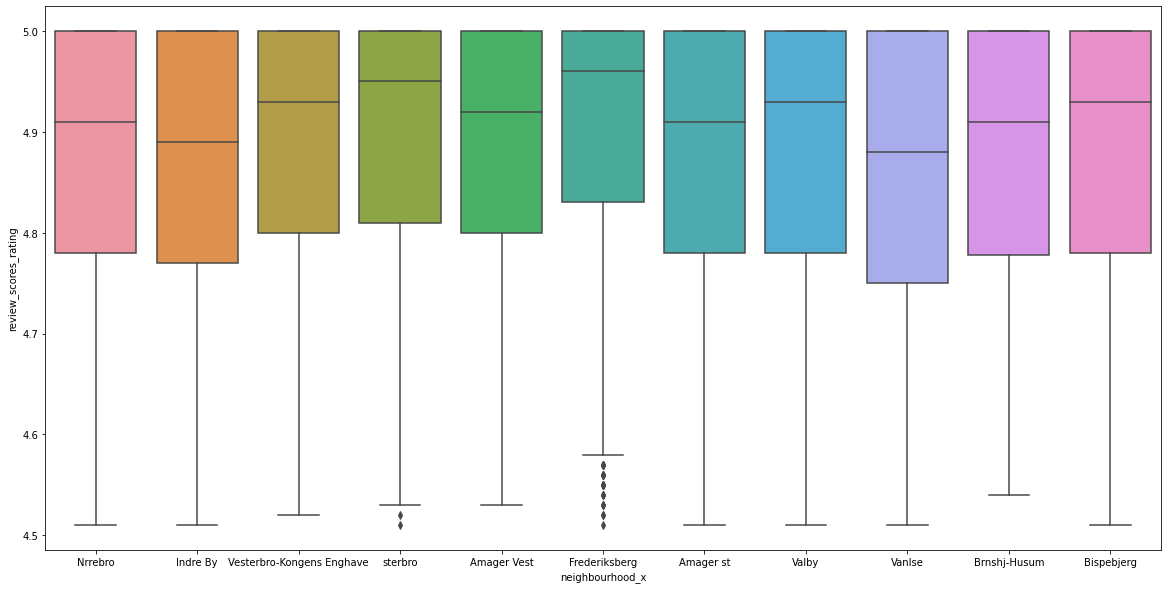

In [35]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='neighbourhood_x', y='review_scores_rating', data=df_listings[df_listings['review_scores_rating'] > 4.5])


In [36]:
# correlation between review_scores_rating and neighbourhood_x in df_listings
plt.figure(figsize=(20, 10))
sns.correlation(df_listings['review_scores_rating'], df_listings['neighbourhood_x'])

AttributeError: module 'seaborn' has no attribute 'correlation'

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

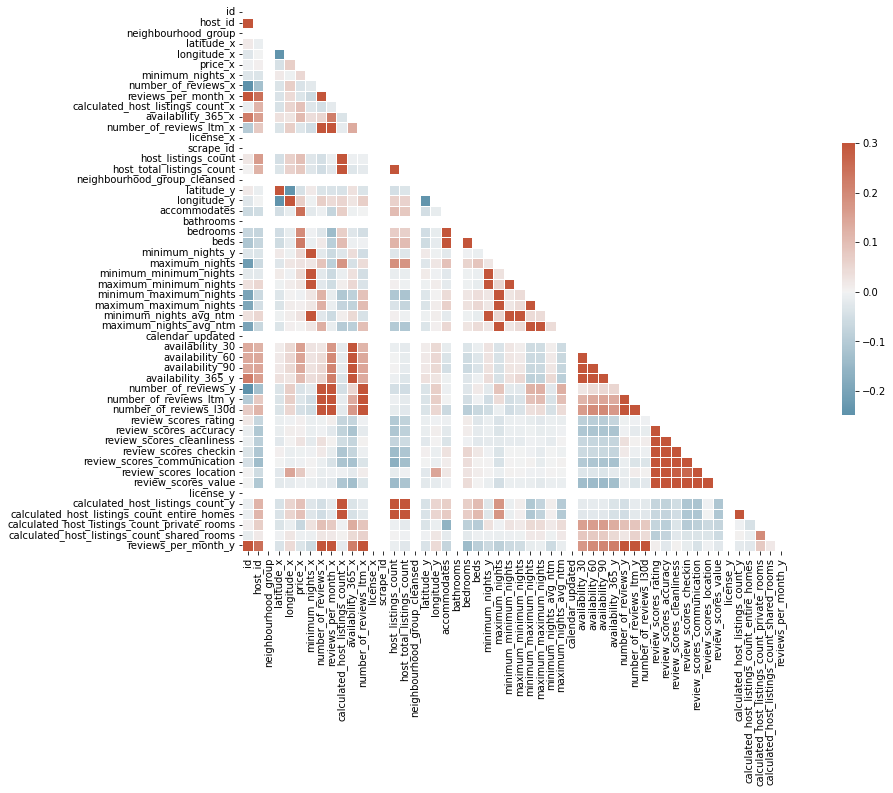

In [38]:
# Compute the correlation matrix
corr = df_listings.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})